In [1]:
import sys
import argparse
import numpy as np
import h5py
from extra_data import open_run
from tqdm import tqdm
from IPython.display import clear_output, display
#from ppxfl import *

from matplotlib import pyplot as plt

In [5]:

f = open("/gpfs/exfel/u/scratch/FXE/202202/p002808/turkot/peakogram_investigation/xwiz/r0241/t_31/r0241_post_cal_03.stream")
Event_Num =[]
Event_Intensity=[]
Event_list =[]
for line in f:
        if line.find("Image serial number") != -1:
            Event_Num = line.split()[3]
            Event_Intensity=[]
            Event_list.append(Event_Num)
Event_list = np.array(Event_list)   
Event_list = Event_list.astype(int)
Event_list = Event_list -1
print(np.shape(Event_list))

(17873,)


In [3]:
proposal = 2808
run      = 241
run = open_run(proposal=proposal, run=run, data="raw")
run.info()

# of trains:    6718
Duration:       0:11:11.8
First train ID: 1530088881
Last train ID:  1530095598

16 detector modules (FXE_DET_LPD1M-1)
  e.g. module FXE_DET_LPD1M-1 0 : 256 x 256 pixels
  FXE_DET_LPD1M-1/DET/0CH0:xtdf
  9 frames per train, up to 60462 frames total

6 instrument sources (excluding detectors):
  - FXE_AUXT_LIC/DOOCS/BAM_1932M:output
  - FXE_AUXT_LIC/DOOCS/BAM_1932S:output
  - FXE_RR_DAQ/ADC/1:network
  - FXE_SMS_MOV/CAM/XEYE:daqOutput
  - SA1_XTD2_XGM/DOOCS/MAIN:output
  - SPB_XTD9_XGM/DOOCS/MAIN:output

32 control sources:
  - FXE_AUXT_LIC/DOOCS/BAM_1932M
  - FXE_AUXT_LIC/DOOCS/BAM_1932S
  - FXE_AUXT_LIC/DOOCS/PPLASER
  - FXE_AUXT_LIC/DOOCS/PPODL
  - FXE_DET_LPD1M-1/COMP/FEM_MDL_COMP
  - FXE_DET_MOV/MOTOR/X
  - FXE_DET_MOV/MOTOR/Y
  - FXE_DET_MOV/MOTOR/Z
  - FXE_SMS_MOV/CAM/XEYE
  - FXE_SMS_USR/MOTOR/UM01
  - FXE_SMS_USR/MOTOR/UM02
  - FXE_SMS_USR/MOTOR/UM03
  - FXE_SMS_USR/MOTOR/UM04
  - FXE_SMS_USR/MOTOR/UM05
  - FXE_SMS_USR/MOTOR/UM06
  - FXE_SMS_USR/MOTOR/UM07


In [4]:
data_module0_raw= run['FXE_DET_LPD1M-1/DET/7CH0:xtdf', 'image.data'].ndarray()

In [ ]:
np.shape(data_module0_proc_proc)

In [5]:
data_module0_raw = np.squeeze(data_module0_raw, axis=1)

In [ ]:
[frames,pix,pix] = np.shape(data_module0)
hit_only_data_module0 = []
hit_only_data_module0 = np.array([data_module0[i] for i in Event_list])
print(np.shape(hit_only_data_module0))

In [ ]:
hits =np.zeros([1,3])
intenisty_cutoff = 15000

for i in range(0,256):
    clear_output(wait=True)
    print(i)
    for j in range(0,256): 
        idx = hit_only_data_module0[:,i,j][hit_only_data_module0[:,i,j]> intenisty_cutoff]

        for k in range(0,len(idx)):
            newrow =[i,j,idx[k]]
            hits = np.vstack([hits, newrow])
print(np.shape(hits))            

In [ ]:
pixel_marker = np.zeros([256,256])
[hit_shape,hit_shape_1] = np.shape(hits)
for idx in range(0,(hit_shape)):
    [i,j,k] = hits[idx,:]
    pixel_marker[int(i),int(j)] = pixel_marker[int(i),int(j)] + 1

In [ ]:
%matplotlib inline 
#Vertical is the first number (i) and horizontal is j #
plt.rcParams['figure.figsize'] = [10, 10]
plt.matshow(pixel_marker, vmin=0, vmax=50)
plt.colorbar()
plt.title('Number or times pixels have exceeded 15000 counts, panel 12 run 241')
plt.show

In [ ]:
all_hits = np.reshape(hit_only_data_module0, (1,np.product(hit_only_data_module0.shape)))[0]
plt.hist(all_hits[:,], bins=5000)
plt.rcParams['figure.figsize'] = [10, 10]
plt.ylim([0, 0.6e7])
plt.xlim([-100, 1000])
plt.show()
##

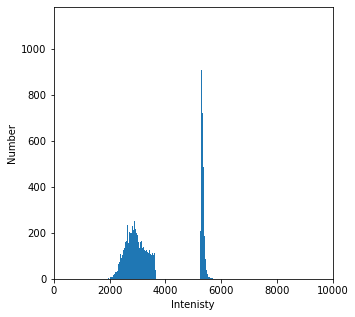

In [12]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.hist(data_module0_raw[:,190,220], bins=1000)
plt.xlabel("Intenisty")
plt.ylabel("Number")
plt.xlim([0, 10000])
#plt.ylim([0, 50])
plt.show()